In [ ]:
# DailyActivity_merged

In [ ]:
88# Step 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas helps you load and manipulate the dataset.
# Matplotlib and Seaborn are used for creating static, animated, and interactive visualizations.

In [ ]:
# Read CSV file into DataFrame
df = pd.read_csv("dailyActivity_merged.csv")

# df (dataframe) is your structured table that now holds all the rows and columns of your dataset.


In [ ]:
# Step 3: Initial Exploration
print("Data Overview:\n", df.head())
print("\nInfo:\n")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

# head() shows the first 5 rows of the dataset to get a quick view of the data format.
# info() reveals data types and non-null values for each column, helping identify:
# if any dates are strings,
# if numeric values are stored correctly.
# isnull().sum() helps detect missing or null values, which could affect analysis accuracy.

Data Overview:
            Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    4/12/2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9762           6.28             6.28   
4  1503960366    4/16/2016       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0     

In [ ]:
# Step 4: Convert 'ActivityDate' to datetime format (if not already)
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])

# Converts your 'ActivityDate' from string (object) to proper datetime format.
# Required for any time-series visualization or date-based filtering.

In [ ]:
# Step 5: Basic Statistics
print("\nDescriptive Statistics:\n", df.describe())

# Mean, min, max, standard deviation, and quartiles for all numeric columns.
# You can quickly spot:
# High variability (std deviation),
# Outliers (very high max vs mean),
# Average activity levels (like average steps per day).


Descriptive Statistics:
                  Id                   ActivityDate    TotalSteps  \
count  9.400000e+02                            940    940.000000   
mean   4.855407e+09  2016-04-26 06:53:37.021276672   7637.910638   
min    1.503960e+09            2016-04-12 00:00:00      0.000000   
25%    2.320127e+09            2016-04-19 00:00:00   3789.750000   
50%    4.445115e+09            2016-04-26 00:00:00   7405.500000   
75%    6.962181e+09            2016-05-04 00:00:00  10727.000000   
max    8.877689e+09            2016-05-12 00:00:00  36019.000000   
std    2.424805e+09                            NaN   5087.150742   

       TotalDistance  TrackerDistance  LoggedActivitiesDistance  \
count     940.000000       940.000000                940.000000   
mean        5.489702         5.475351                  0.108171   
min         0.000000         0.000000                  0.000000   
25%         2.620000         2.620000                  0.000000   
50%         5.245000      

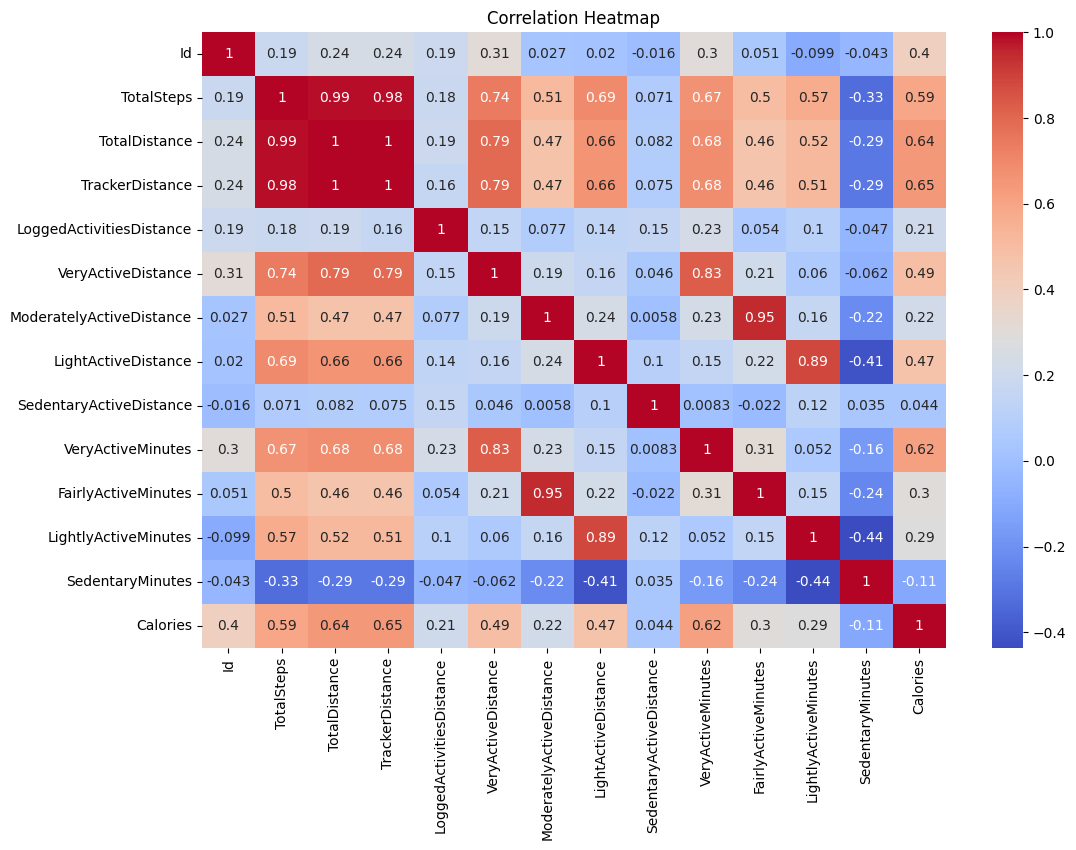

In [ ]:

# Step 6: Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Shows the relationship between features.
# For example:
# TotalSteps and Calories will likely show strong positive correlation.
# SedentaryMinutes may have a negative or low correlation with steps or calories.
# Helps you understand which variables move together — useful for predictive modeling.

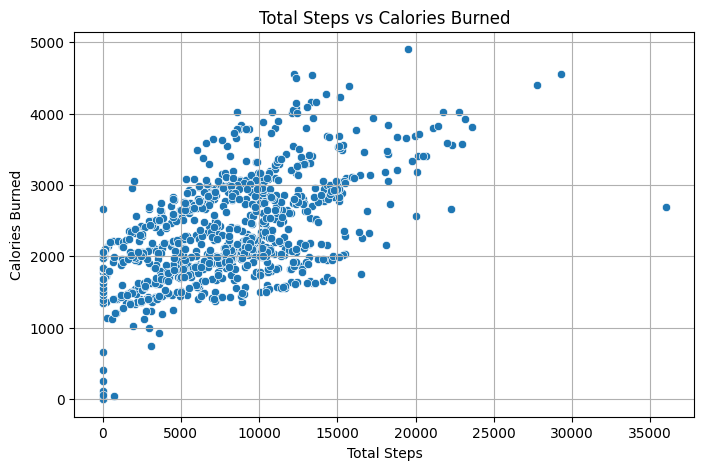

In [ ]:
# Step 7: Steps vs Calories
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='TotalSteps', y='Calories')
plt.title("Total Steps vs Calories Burned")
plt.xlabel("Total Steps")
plt.ylabel("Calories Burned")
plt.grid(True)
plt.show()


# A direct visual correlation:
# More steps → more calories burned.
# Identifies clusters of low-activity and high-activity users.
# Detects outliers — e.g., days where few steps still burned many calories.

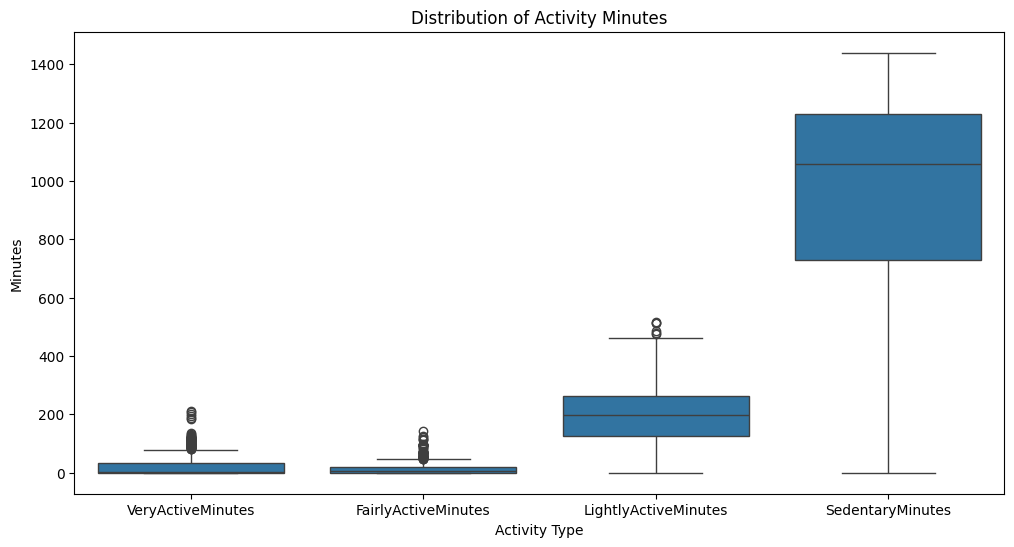

In [ ]:
# Step 8: Activity Minutes Distribution
activity_cols = ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']
df_melted = df.melt(id_vars='ActivityDate', value_vars=activity_cols, var_name='Activity Type', value_name='Minutes')

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x='Activity Type', y='Minutes')
plt.title("Distribution of Activity Minutes")
plt.show()


# Shows how different activity intensities vary:
# SedentaryMinutes usually have the highest range.
# VeryActiveMinutes are lower but more relevant for fitness.
# Outliers (dots) show unusual days — e.g., days with very high VeryActiveMinutes.

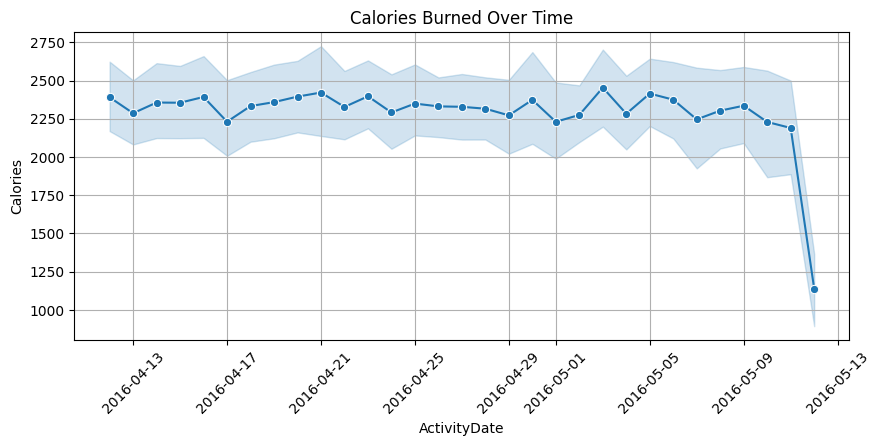

In [ ]:
# Step 9: Calories Over Time
plt.figure(figsize=(10, 4))
sns.lineplot(data=df, x='ActivityDate', y='Calories', marker='o')
plt.title("Calories Burned Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Visualizes how calories burned change day-by-day.
# Helps detect fitness streaks or lazy periods.
# Useful for seeing progress or fluctuations in physical activity.

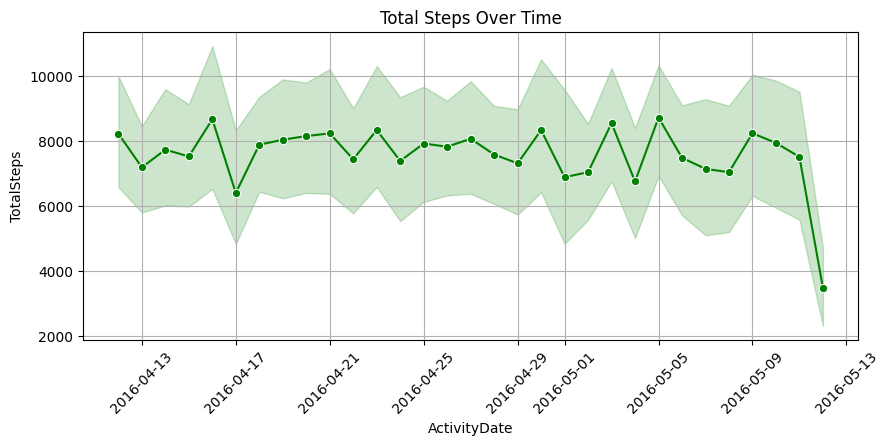

In [ ]:
# Step 10: Total Steps Over Time
plt.figure(figsize=(10, 4))
sns.lineplot(data=df, x='ActivityDate', y='TotalSteps', marker='o', color='green')
plt.title("Total Steps Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Same as above, but focused on steps taken daily.
# Identifies peak performance days or consistent low-activity days.
# Can help correlate with weekends or other events.

In [ ]:
# HourlyActivity_merged

In [ ]:
# STEP 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pandas: Library used to load, clean, and manipulate tabular data.
# matplotlib.pyplot: Used for creating visual plots like bar graphs and line charts.
# seaborn: Built on top of Matplotlib, it makes prettier and more insightful statistical plots.
# %matplotlib inline: Ensures that plots appear directly in the Colab notebook

In [ ]:
# Display plots in the notebook
%matplotlib inline

In [ ]:
df = pd.read_csv('hourlyActivity_merged.csv')

In [ ]:

# STEP 3: Convert ActivityHour to datetime and extract hour
df['ActivityHour'] = pd.to_datetime(df['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')
df['Hour'] = df['ActivityHour'].dt.hour

# Converts the ActivityHour column from a string (like "4/12/2016 12:00:00 AM") to an actual datetime object.
# Extracts just the hour of the day (0 to 23) and stores it in a new column Hour.

In [ ]:
# STEP 4: Quick look at data
print(df.head())
print("\nSummary:\n", df.describe())

# df.head() shows the first 5 rows of your dataset.
# df.describe() gives statistical summaries of numeric columns (mean, std, min, max, etc.)


           Id        ActivityHour  StepTotal  TotalIntensity  \
0  1503960366 2016-04-12 00:00:00        373              20   
1  1503960366 2016-04-12 01:00:00        160               8   
2  1503960366 2016-04-12 02:00:00        151               7   
3  1503960366 2016-04-12 03:00:00          0               0   
4  1503960366 2016-04-12 04:00:00          0               0   

   AverageIntensity  Calories  Hour  
0          0.333333        81     0  
1          0.133333        61     1  
2          0.116667        59     2  
3          0.000000        47     3  
4          0.000000        48     4  

Summary:
                  Id                   ActivityHour     StepTotal  \
count  2.209900e+04                          22099  22099.000000   
mean   4.848235e+09  2016-04-26 11:46:42.588352512    320.166342   
min    1.503960e+09            2016-04-12 00:00:00      0.000000   
25%    2.320127e+09            2016-04-19 01:00:00      0.000000   
50%    4.445115e+09            2016-

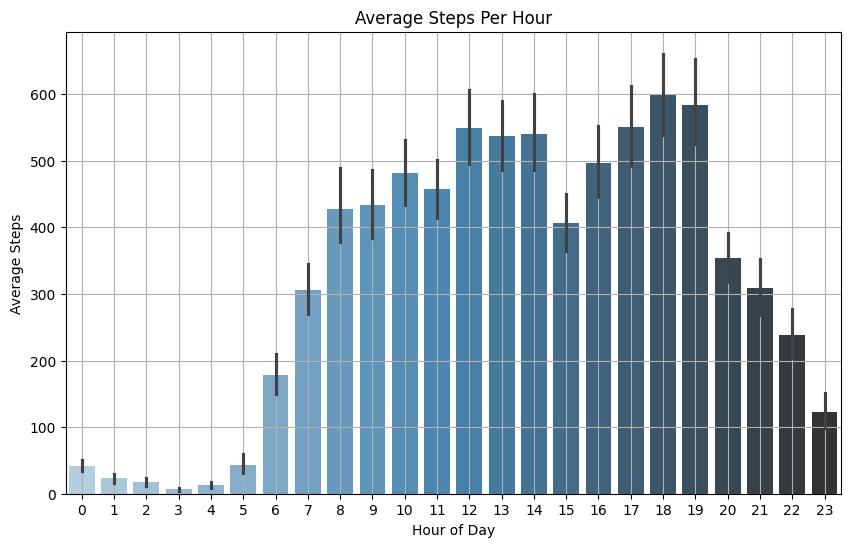

In [ ]:
# STEP 5: Plot 1 - Average Steps Per Hour
plt.figure(figsize=(10,6))
sns.barplot(x='Hour', y='StepTotal', hue='Hour', data=df, estimator='mean', palette='Blues_d', legend=False)
plt.title('Average Steps Per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Steps')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# Creates a bar chart showing the average number of steps for each hour of the day.
# estimator='mean' ensures it computes average steps when there are multiple entries for each hour.

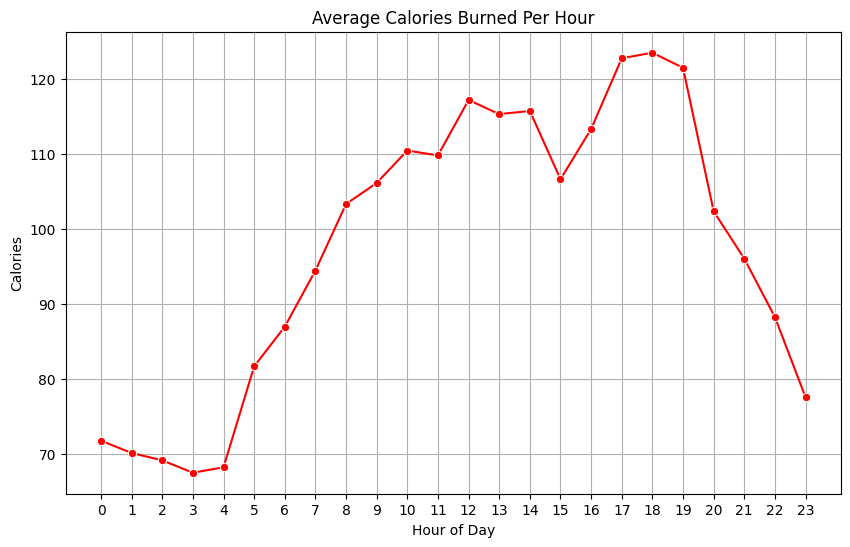

In [ ]:

# STEP 6: Plot 2 - Calories burned per hour
plt.figure(figsize=(10,6))
sns.lineplot(x='Hour', y='Calories', data=df, estimator='mean', errorbar=None, marker='o', color='red')
plt.title('Average Calories Burned Per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Calories')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()



# Draws a line plot to show how calories burned vary throughout the day.
# marker='o' puts dots on each point to make it easier to interpret.

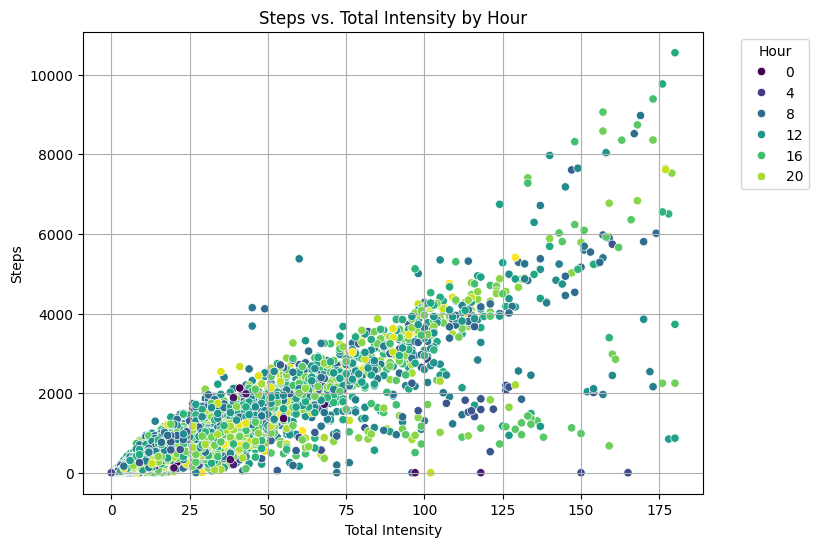

In [ ]:
# STEP 7: Plot 3 - Intensity vs Steps Scatter Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='TotalIntensity', y='StepTotal', hue='Hour', data=df, palette='viridis')
plt.title('Steps vs. Total Intensity by Hour')
plt.xlabel('Total Intensity')
plt.ylabel('Steps')
plt.legend(title='Hour', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Creates a scatter plot showing the relationship between step count and intensity.
# Colors each dot based on the hour of the day.

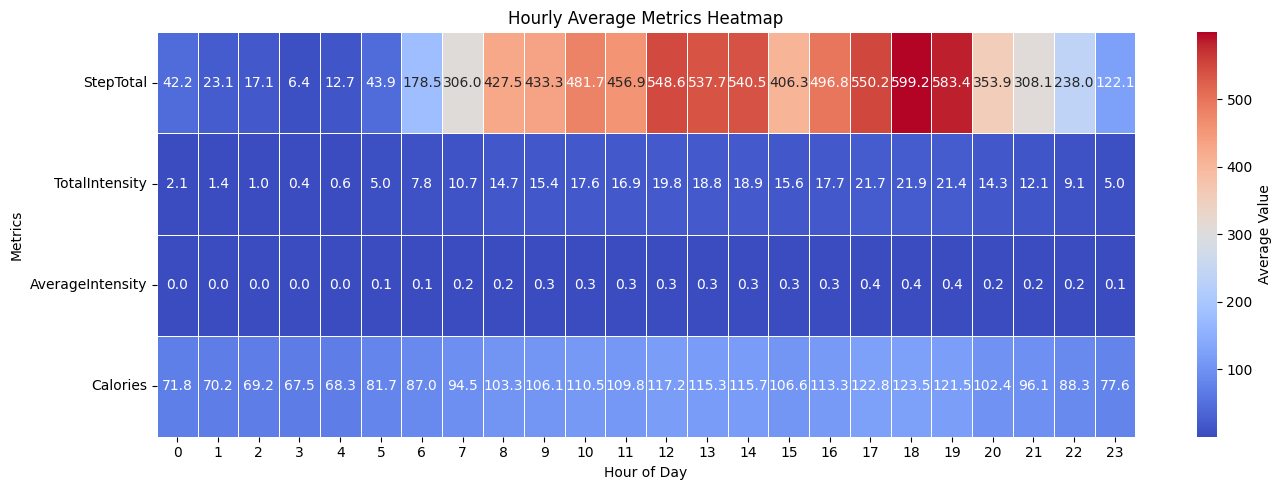

In [ ]:
# STEP 8: Heatmap of average values by hour
hourly_avg = df.groupby('Hour')[['StepTotal', 'TotalIntensity', 'AverageIntensity', 'Calories']].mean()

# Ensure columns (hours) are sorted correctly
hourly_avg = hourly_avg.sort_index()

# Transpose for heatmap (metrics as rows, hours as columns)
heatmap_data = hourly_avg.T

# Plot heatmap
plt.figure(figsize=(14, 5))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'Average Value'})

plt.title('Hourly Average Metrics Heatmap')
plt.xlabel('Hour of Day')
plt.ylabel('Metrics')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Groups data by each hour and calculates the average of all metrics.
# Transposes (.T) the DataFrame to make hours the columns and metrics the rows.
# Uses a heatmap to highlight intensity of values with colors.